In [1]:
import os
os.chdir('/home/angel/ProjectDataScience/')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('master.csv')

In [4]:
df = df.drop('HDI for year',axis=1)

In [5]:
df = df[df.year <= 2015]

In [6]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


First let's rank the suicides rates according to different parameters

In [7]:
df.groupby('generation').suicides_no.sum().nlargest(10)

generation
Boomers            2279783
Silent             1779887
Generation X       1527038
Millenials          620194
G.I. Generation     510009
Generation Z         15906
Name: suicides_no, dtype: int64

In [8]:
df.groupby('country').suicides_no.sum().nlargest(10)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

In [9]:
df.groupby(['country','generation']).suicides_no.sum().nlargest(10)

country             generation  
Russian Federation  Boomers         470925
United States       Boomers         354662
Japan               Silent          297885
Russian Federation  Silent          290471
                    Generation X    275309
United States       Generation X    253704
Japan               Boomers         241420
United States       Silent          228971
Japan               Generation X    133292
Russian Federation  Millenials      119618
Name: suicides_no, dtype: int64

In [10]:
df.groupby(['country','generation']).suicides_no.sum().nlargest(10)

country             generation  
Russian Federation  Boomers         470925
United States       Boomers         354662
Japan               Silent          297885
Russian Federation  Silent          290471
                    Generation X    275309
United States       Generation X    253704
Japan               Boomers         241420
United States       Silent          228971
Japan               Generation X    133292
Russian Federation  Millenials      119618
Name: suicides_no, dtype: int64

In [11]:
df.groupby(['country','sex']).suicides_no.sum().nlargest(10)

country             sex   
Russian Federation  male      995412
United States       male      820216
Japan               male      555272
Ukraine             male      258573
Japan               female    251630
France              male      239708
Russian Federation  female    214330
United States       female    213797
Germany             male      211555
Republic of Korea   male      179115
Name: suicides_no, dtype: int64

In [12]:
df.groupby(['country','year']).suicides_no.sum().nlargest(10)

country             year
Russian Federation  1994    61420
                    1995    60548
                    1996    57511
                    1999    56974
                    2001    56958
                    2000    56619
                    1993    55846
                    2002    55024
                    1997    54746
                    1998    51518
Name: suicides_no, dtype: int64

In [13]:
df.groupby(['year']).suicides_no.sum().plot()

In [14]:
df.groupby(['year']).suicides_no.sum().nlargest(10)

year
1999    256119
2002    256095
2003    256079
2000    255832
2001    250652
1998    249591
1996    246725
1995    243544
2009    243487
2004    240861
Name: suicides_no, dtype: int64

In [15]:
import matplotlib.pyplot as plt

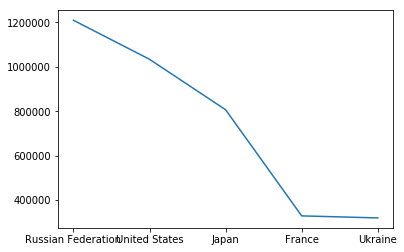

In [16]:
plt.plot(df.groupby(['country']).suicides_no.sum().nlargest(5))

Comme il était prévu, on peut voir que le nombre de suicides a una relation directe avec la population.

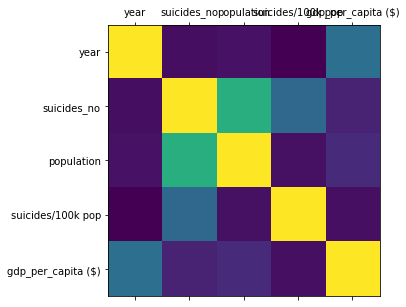

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [18]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.002953,0.011583,-0.039800,0.338854
suicides_no,-0.002953,1.000000,0.616105,0.307103,0.062168
population,0.011583,0.616105,1.000000,0.008461,0.083006
suicides/100k pop,-0.039800,0.307103,0.008461,1.000000,0.002015
gdp_per_capita ($),0.338854,0.062168,0.083006,0.002015,1.000000


In [19]:
import seaborn as sns; sns.set()

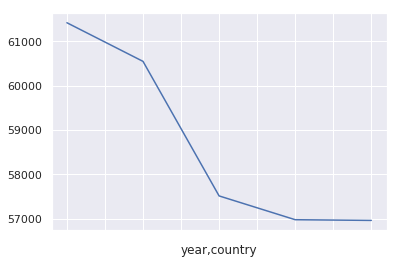

In [20]:
df.groupby(['year','country']).suicides_no.sum().nlargest(5).plot()

In [21]:
df.sort_values('suicides_no',ascending=False)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,Russian Federation1994,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,Russian Federation1995,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,Russian Federation2001,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,Russian Federation2000,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,Russian Federation1999,"195,905,767,669",1412,Boomers
21020,Russian Federation,1996,male,35-54 years,20562,19507100,105.41,Russian Federation1996,"391,719,993,757",2813,Boomers
20984,Russian Federation,1993,male,35-54 years,20256,18908000,107.13,Russian Federation1993,"435,083,713,851",3160,Boomers
21092,Russian Federation,2002,male,35-54 years,20119,21320535,94.36,Russian Federation2002,"345,110,438,692",2527,Boomers
21033,Russian Federation,1997,male,35-54 years,18973,19913400,95.28,Russian Federation1997,"404,926,534,140",2907,Boomers
21105,Russian Federation,2003,male,35-54 years,18681,21007346,88.93,Russian Federation2003,"430,347,770,732",3141,Boomers


In [22]:
22338/3

7446.0